# Cirq

## Installation

``pip install cirq``

## Import

In [1]:
import cirq
import math
import numpy as np

## Hello Qubit

In [2]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit
circuit = cirq.Circuit()
circuit.append(cirq.measure(qubit))

print("Circuit")
print(circuit)

Circuit
0: ───M───


# NOT

In [3]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit))

print("Circuit")
print(circuit)

Circuit
0: ───X───


# CNOT

In [4]:
# pick qubits
qubit0 = cirq.LineQubit(0) # position 0
qubit1 = cirq.LineQubit(1) # position 1

circuit = cirq.Circuit()
circuit.append(cirq.CNOT(control=qubit0, target=qubit1))

print("Circuit")
print(circuit)

Circuit
0: ───@───
      │
1: ───X───


## Hadamard

Circuit
0: ───H───M───
Result
0=11010001110000110011100000000111000111100100000001110101010001100011110100100011100000100001001100010110001000100011000010000010011001101001000000110100100010000000011110111010010101010100011111001010000101011010101110110100100010001001110011001011011111110101100101100011000101011111111000000010101010011011011101010100010110001001010111011110100101111010110100110100010001000000100100101001000111010000101001101100111101100110110101100111100000110111011101100000001010001011111011010000111000111001111000001011110100000110101111111000101010101001010100110010100001000001100100001110111101111010000011010101010010001000011000111001110010101110001010110000010110100001101101001000001110100011010110110101010101101111001101000101101111011001011101010010000101101000111000100110001110000010110000101100101011011100000001110100000000011001100111010101111111101011001000000110011101010011110110111010100111110100110100100011110000111001111001010011100000000101001001001100

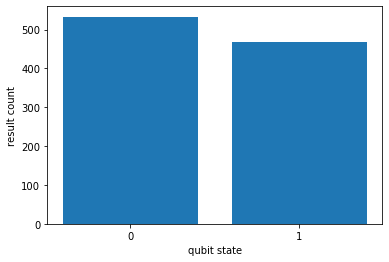

array([533., 467.])

In [5]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit with HADAMARD
circuit = cirq.Circuit(
    cirq.H(qubit),
    cirq.measure(qubit)
)

print("Circuit")
print(circuit)

# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

print("Result")
print(result)

cirq.plot_state_histogram(result)

# Deutsch Algorithm

#### Structure of Circuits in Cirq
- **Circuit:** Collection of Moments
- **Moment:** Collection of Operations at a specific "time"
- **Operation:** Effect that operates on a specific subset of qubits

In [6]:
# 2 qubits
qubit0 = cirq.LineQubit(0)
qubit1 = cirq.LineQubit(1)

def get_oracle_gate(oracle):
    rnd = np.random.randint(2)
    # if oracle is constant
    if oracle == "c":
        if rnd == 1:
            return [cirq.I(qubit0), cirq.X(qubit1)]
        else:
            return [cirq.I(qubit0), cirq.I(qubit1)]
    # if oracle is balanced
    else:
        if rnd == 1:
            return [cirq.CNOT(control=qubit0, target=qubit1), cirq.X(qubit1)]
        else:
            return cirq.CNOT(control=qubit0, target=qubit1)

# moments
moment_h_all = cirq.Moment( [cirq.H(qubit0), cirq.H(qubit1)] )
moment_m_all = cirq.Moment( [cirq.measure(qubit0), cirq.measure(qubit1)] )

# circuit
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit1))
circuit.append(moment_h_all)

circuit.append(get_oracle_gate("b")) # insert oracle gate
#circuit.append(get_oracle_gate("c"))

circuit.append(moment_h_all)
circuit.append(moment_m_all)

#circuit.append(cirq.H(qubit0))
#circuit.append(cirq.measure(qubit0))

print("Circuit")
print(circuit)

Circuit
0: ───────H───@───H───M───
              │
1: ───X───H───X───H───M───


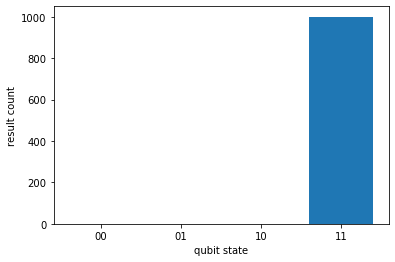

array([   0.,    0.,    0., 1000.])

In [7]:
# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

cirq.plot_state_histogram(result)

# Deutsch-Josza Algorithm

In [8]:
# n qubits
n_qubits = 5

# pick up qubits
qubits = [cirq.LineQubit(x) for x in range(n_qubits+1)]

# oracle gate
def get_oracle_gate(oracle):
    rnd = np.random.randint(2)
    # if oracle is constant
    if oracle == "c":
        if rnd == 1:
            gate = [cirq.I(qubit) for qubit in qubits[:-1]]
            gate.append(cirq.X(qubits[n_qubits]))
            return gate
        else:
            return [cirq.I(qubit) for qubit in qubits]
    # if oracle is balanced
    else:
        if rnd == 1:
            gate = [cirq.CNOT(control=qubit, target=qubits[n_qubits]) for qubit in qubits[:-1]]
            gate.append(cirq.X(qubits[n_qubits]))
            return gate
        else:
            return [cirq.CNOT(control=qubit, target=qubits[n_qubits]) for qubit in qubits[:-1]]

# gates
gate_x_last = cirq.X(qubits[n_qubits])
gate_h_all = [cirq.H(qubit) for qubit in qubits]
gate_m_all = [cirq.measure(qubit) for qubit in qubits]
gate_h_all_ex_last = [cirq.H(qubit) for qubit in qubits[:-1]]
gate_m_all_ex_last = [cirq.measure(qubit) for qubit in qubits[:-1]]

In [9]:
# moments
moment_x_last = cirq.Moment([gate_x_last])
moment_h_all = cirq.Moment(gate_h_all)
moment_m_all = cirq.Moment(gate_m_all)
moment_h_all_ex_last = cirq.Moment(gate_h_all_ex_last)
moment_m_all_ex_last = cirq.Moment(gate_m_all_ex_last)

In [10]:
# circuit
circuit = cirq.Circuit()
circuit.append(moment_x_last)
circuit.append(moment_h_all)

circuit.append(get_oracle_gate("b"))

circuit.append(moment_h_all_ex_last)
circuit.append(moment_m_all_ex_last)

print("Circuit")
print(circuit)

Circuit
0: ───────H───@───────────────────H───M───
              │
1: ───────H───┼───@───────────────H───M───
              │   │
2: ───────H───┼───┼───@───────────H───M───
              │   │   │
3: ───────H───┼───┼───┼───@───────H───M───
              │   │   │   │
4: ───────H───┼───┼───┼───┼───@───H───M───
              │   │   │   │   │
5: ───X───H───X───X───X───X───X───────────


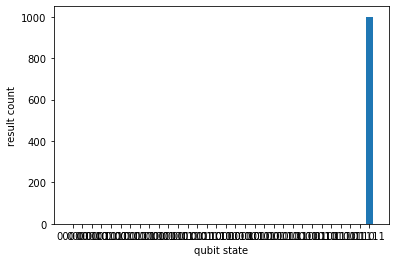

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0., 1000.])

In [11]:
# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

cirq.plot_state_histogram(result)